# Подготовка данных.
Предобработка данных.

In [4]:
# Импортируем необходимые библиотеки(сразу все)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [5]:
#Загружаем первый датасет (базальтопластик) и сразу удаляем первый столбец
df_bp = pd.read_excel("C:/Users/ASUS/Desktop/DS/Баумана/ВКР/hw_data_composite/X_bp.xlsx", index_col=0)
df_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [6]:
#Загружаем второй датасет (углепластик) и тоже удаляем первый столбец
df_nup = pd.read_excel("C:/Users/ASUS/Desktop/DS/Баумана/ВКР/hw_data_composite/X_nup.xlsx", index_col=0)
df_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [7]:
#объединяем эти датасеты методом INNER в один - df
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [8]:
#просмотрим иформацию о получившемся датасете
df.info()
#все признаки имеют тип float64 кроме "угол нашивки", пропусков или нулевых значений нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [9]:
#Проверим уникальные значения с помощью функции nunique
df.nunique()
#Обратим внимание, что в колонке "Угол нашивки" всего 2 значения, которые, принеобходимости, можно преобразовать

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [10]:
# Рассмотрим описательную статистику, поменяв местами колонки и строки
descr =df.describe()
descr.T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

# Визуализация данных

In [11]:
# определяем выбросы
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

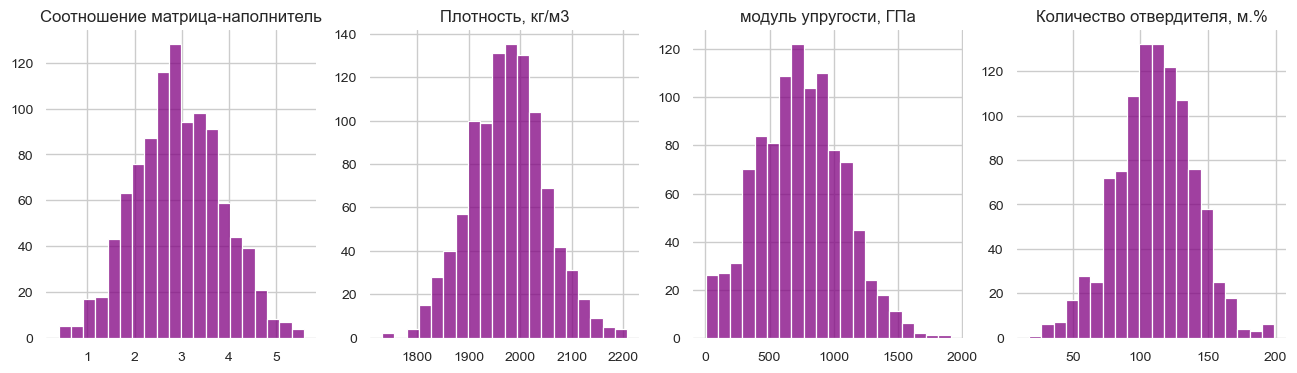

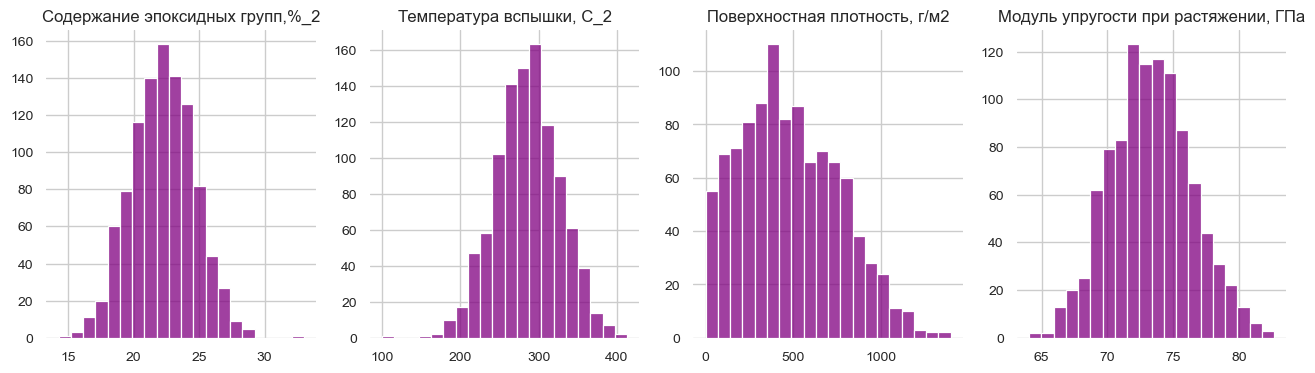

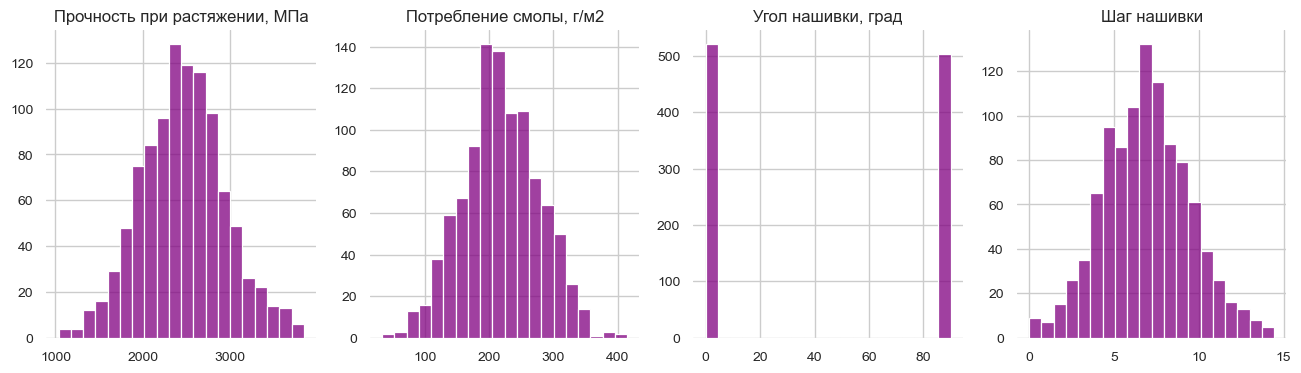

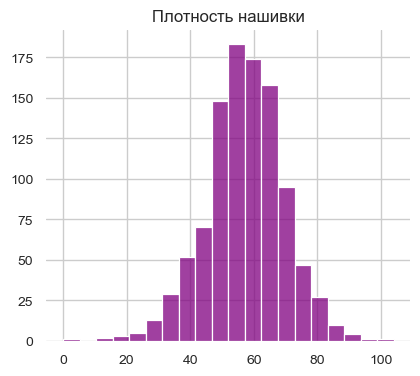

In [12]:
sns.set(style="whitegrid", font_scale=1.2)

# задаем размеры графика
height = 4
aspect = 1

# выводим гистограммы распределения для каждой переменной
for i, col in enumerate(df.columns):
    if i % 4 == 0:
        fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(height*aspect*4, height))
    sns.histplot(df[col], kde=False, bins=20, color='purple', ax=ax[i%4])
    ax[i%4].set_title(col, fontsize=12)
    ax[i%4].set_xlabel('')
    ax[i%4].set_ylabel('')
    ax[i%4].tick_params(axis='both', which='major', labelsize=10)
    ax[i%4].tick_params(axis='both', which='minor', labelsize=8)
    sns.despine(left=True, bottom=True)

# удаляем лишние графики
if len(df.columns) % 4 != 0:
    for i in range(len(df.columns) % 4, 4):
        fig.delaxes(ax[-i])
        
plt.tight_layout()
plt.show()




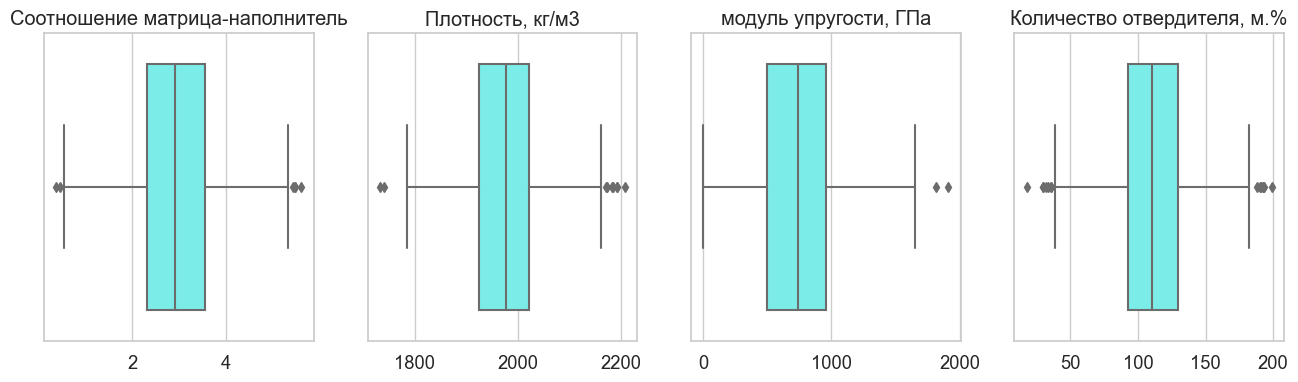

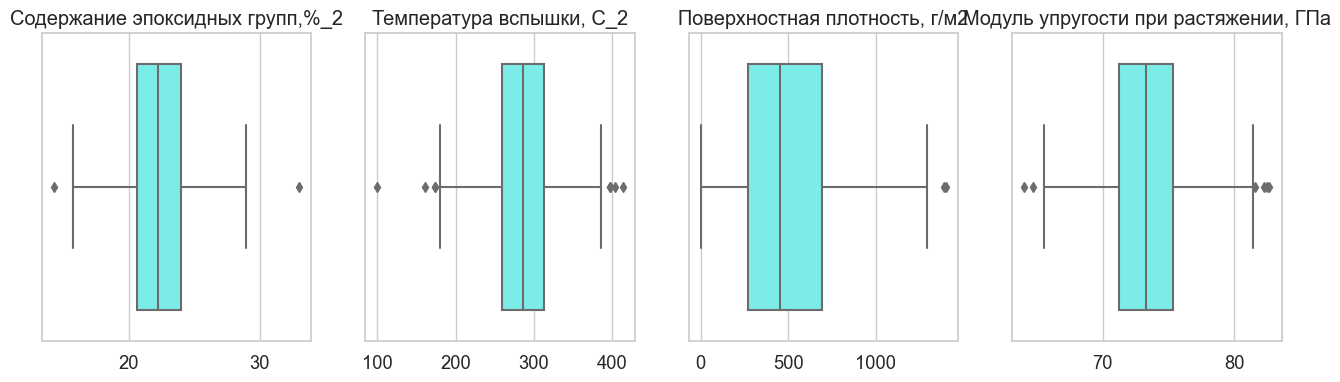

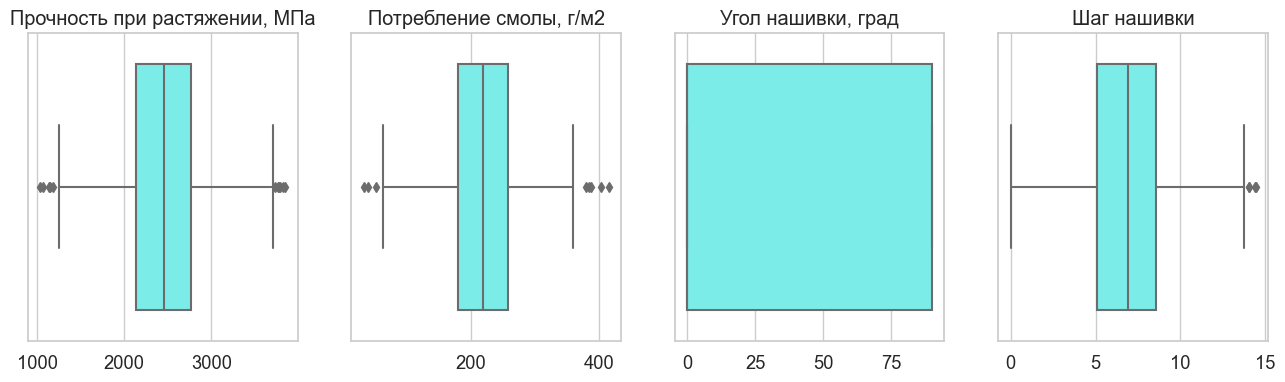

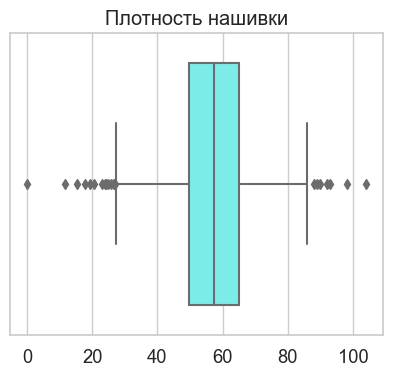

In [13]:
# выводим boxplot для каждой переменной
for i, col in enumerate(df.columns):
    if i % 4 == 0:
        fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(height*aspect*4, height))
    sns.boxplot(x=df[col], ax=ax[i%4], color="#69fffb")
    ax[i%4].set_title(col)
    ax[i%4].set_xlabel("")
    ax[i%4].set_ylabel("")
# удаляем лишние графики
if len(df.columns) % 4 != 0:
    for i in range(len(df.columns) % 4, 4):
        fig.delaxes(ax[-i])

plt.tight_layout()
plt.show()


In [14]:
#Для получения среднего и медианного значения для каждой колонки можно использовать 
#методы mean() и median() соответственно, примененные к датафрейму.
mean_values = df.mean()
median_values = df.median()
print("Средние значения:")
print(mean_values)
print("\nМедианные значения:")
print(median_values)


Средние значения:
Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

Медианные значения:
Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температур

In [15]:
# удаляем выбросы методом 3х сигм
mean = df[col].mean()
std = df[col].std()
df = df[(df[col] < mean + 3*std) & (df[col] > mean - 3*std)]

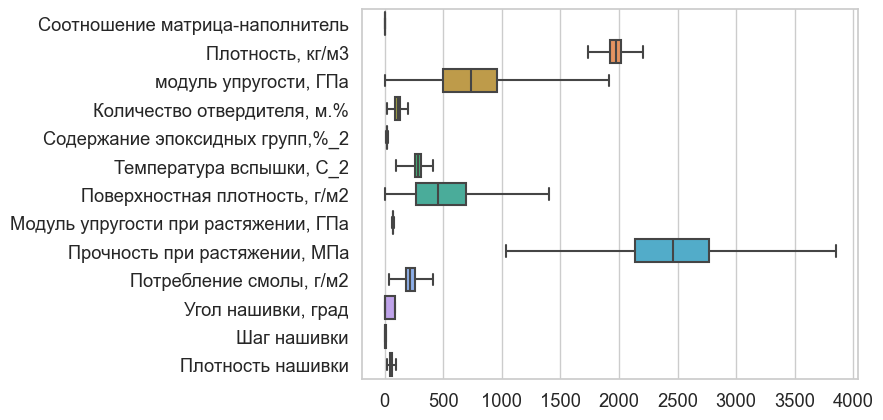

In [16]:
# повторяем визуализацию с ящиком с усами без выбросов

sns.boxplot(data = df, orient="h", whis=10)
plt.show()

In [17]:
# проведение нормализации данных
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)


In [18]:
df = normalized_data

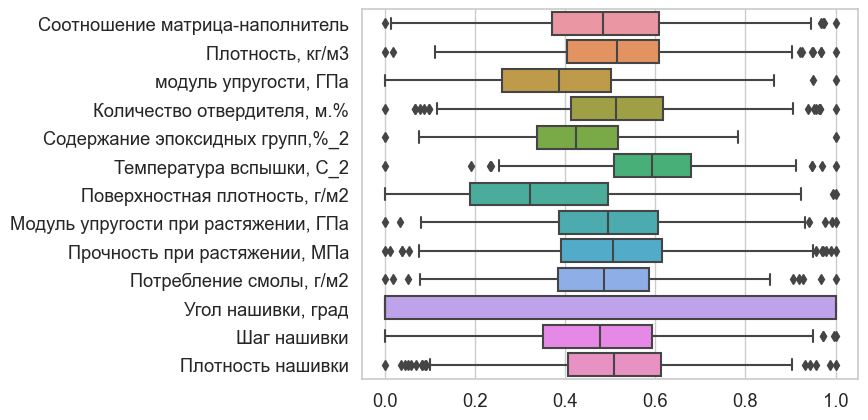

In [19]:
#Посмотрим, как изменилась визуализация ящика с усами после нормализации
sns.boxplot(data = normalized_data, orient="h")
plt.show()

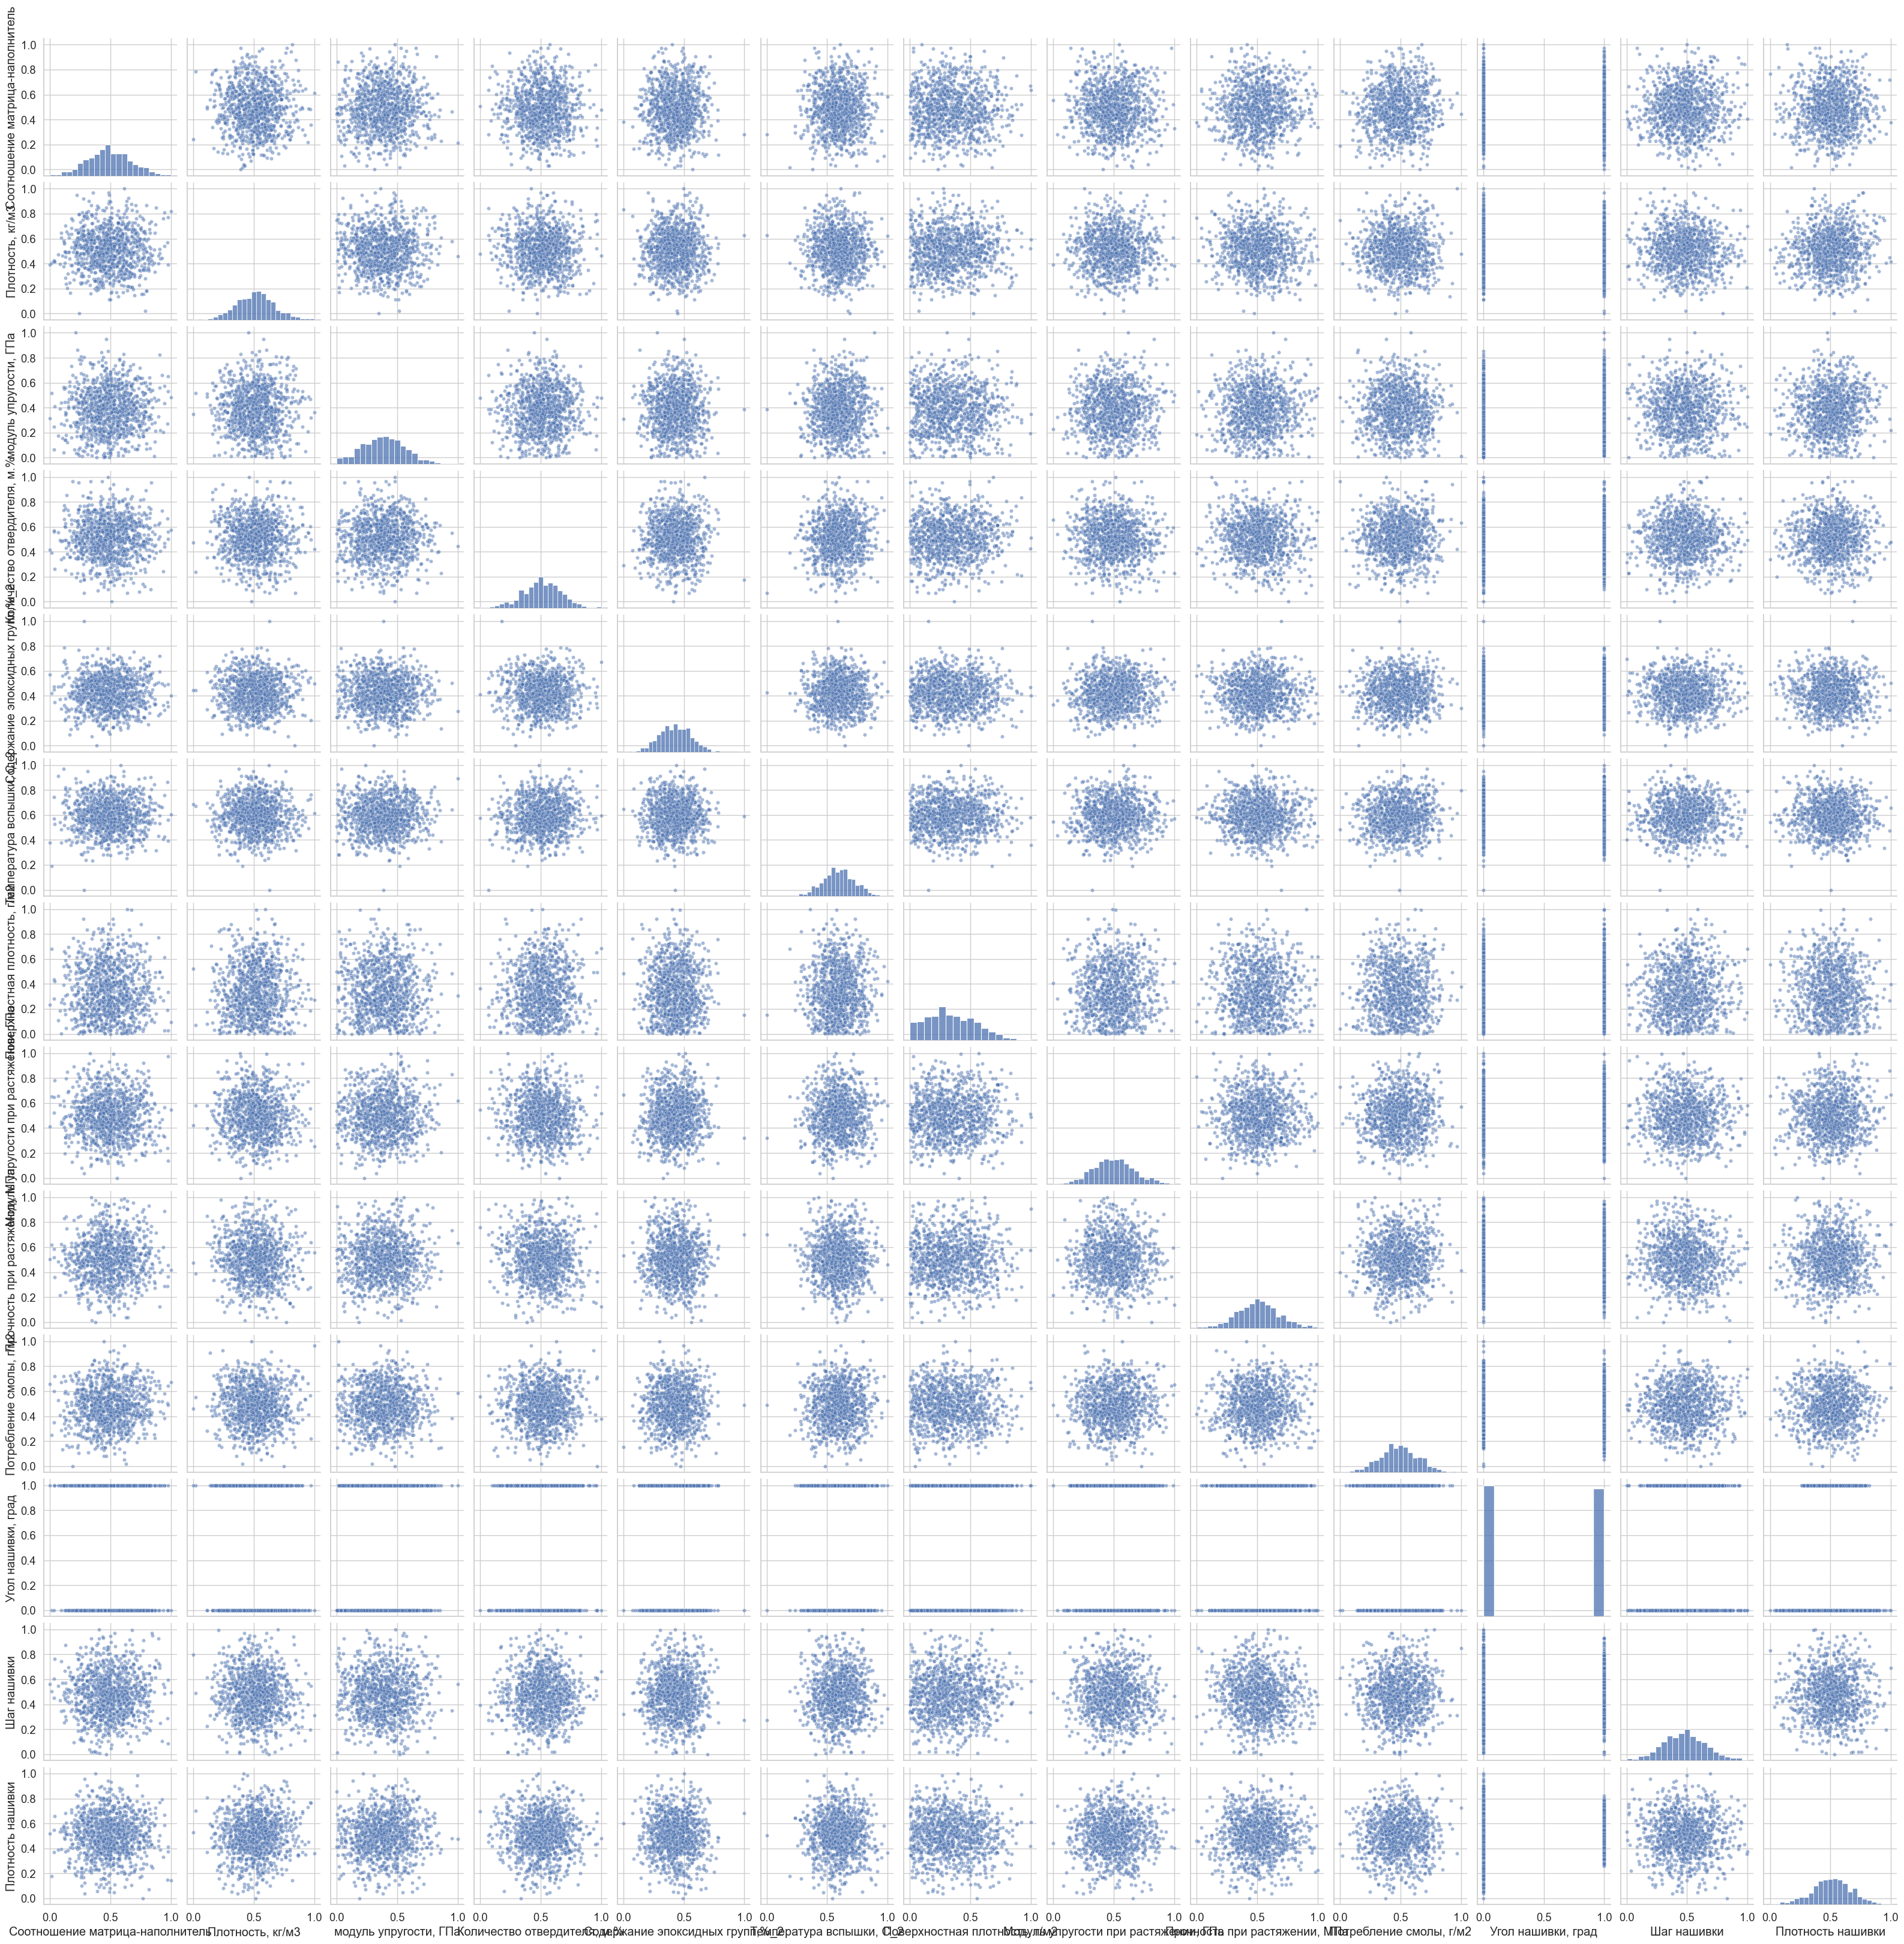

In [20]:
#создадим попарные графики рассеяния точек для всех признаков в датафрейме 
sns.pairplot(normalized_data, diag_kind='hist', plot_kws=dict(s=20, edgecolor="white", alpha=0.5), diag_kws=dict(edgecolor="white"))
#корреляция не наблюдается

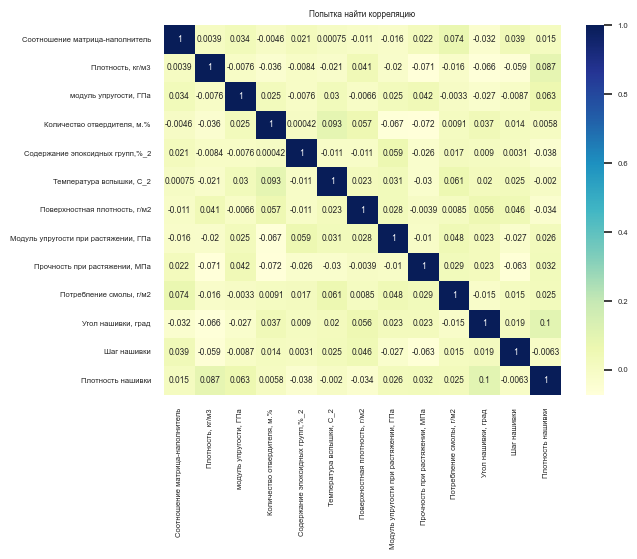

In [21]:
# построим тепловую карту
sns.set(font_scale=0.5)
sns.heatmap(normalized_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Попытка найти корреляцию")
plt.show()
#корреляция не обнаружена

Думаю, что на этом этап предобработки данных можно завершить и пеереходить к разработки модели.


In [37]:
#Сохраняем датасет
df.to_csv('VKR.csv', index = False)
